## Import des bibliothèques

In [182]:
import glob as gb
import pandas as pd
import tensorflow as tf
import cv2
import numpy as np

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from PIL import Image

import matplotlib.pyplot as plt
from keras.models import Model
from keras.preprocessing import image
from keras.models import load_model

#import modules.images.utils as im

In [162]:
trainpath = '../data/train1' 
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( path +'/' + folder + '/*.png'))
    print(f'For data , found {len(files)} in folder {folder}')

For data , found 500 in folder baby
For data , found 500 in folder bear
For data , found 500 in folder bicycle
For data , found 500 in folder boy


In [163]:
size = []
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( path +'/' + folder + '/*.png'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(32, 32, 3)    2000
dtype: int64

In [172]:
image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)
TRAIN_DATA_DIR = '../data/train1'
TRAIN_IMAGE_SIZE = 32
TRAIN_BATCH_SIZE = 32
train_generator = image_data_generator.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical',
    subset='training')
validation_generator = image_data_generator.flow_from_directory(
    TRAIN_DATA_DIR, # same directory as training data
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical',
    subset='validation')

Found 1600 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


## Construction du modèle

In [179]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(32,32,3))) 
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_113 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 8, 8, 64)          36928     
_________________________________________________________________
flatten_51 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_83 (Dense)             (None, 64)              

In [180]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
training = model.fit_generator(train_generator, epochs=50, callbacks=[es_callback], validation_data=validation_generator)

Epoch 1/50
50/50 [==============================] - 11s 223ms/step - loss: 1.4418 - accuracy: 0.2394 - val_loss: 1.3868 - val_accuracy: 0.2500
Epoch 2/50
50/50 [==============================] - 11s 218ms/step - loss: 1.3875 - accuracy: 0.2338 - val_loss: 1.3866 - val_accuracy: 0.2500
Epoch 3/50
50/50 [==============================] - 11s 217ms/step - loss: 1.3876 - accuracy: 0.2562 - val_loss: 1.3868 - val_accuracy: 0.2500
Epoch 4/50
50/50 [==============================] - 11s 221ms/step - loss: 1.3893 - accuracy: 0.2431 - val_loss: 1.3867 - val_accuracy: 0.2500
Epoch 5/50
50/50 [==============================] - 12s 231ms/step - loss: 1.3885 - accuracy: 0.2244 - val_loss: 1.3864 - val_accuracy: 0.2500
Epoch 6/50
50/50 [==============================] - 13s 263ms/step - loss: 1.3895 - accuracy: 0.2344 - val_loss: 1.3864 - val_accuracy: 0.2500
Epoch 7/50
50/50 [==============================] - 13s 258ms/step - loss: 1.3881 - accuracy: 0.2344 - val_loss: 1.3866 - val_accuracy: 0.2500

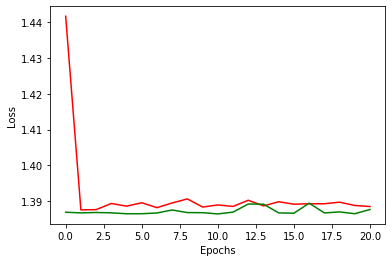

In [181]:
plt.plot(training.history['loss'], color='red', label='Training loss')
plt.plot(training.history['val_loss'],  color='green', label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

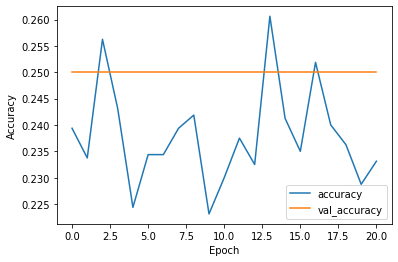

In [184]:

plt.plot(training.history['accuracy'], label='accuracy')
plt.plot(training.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


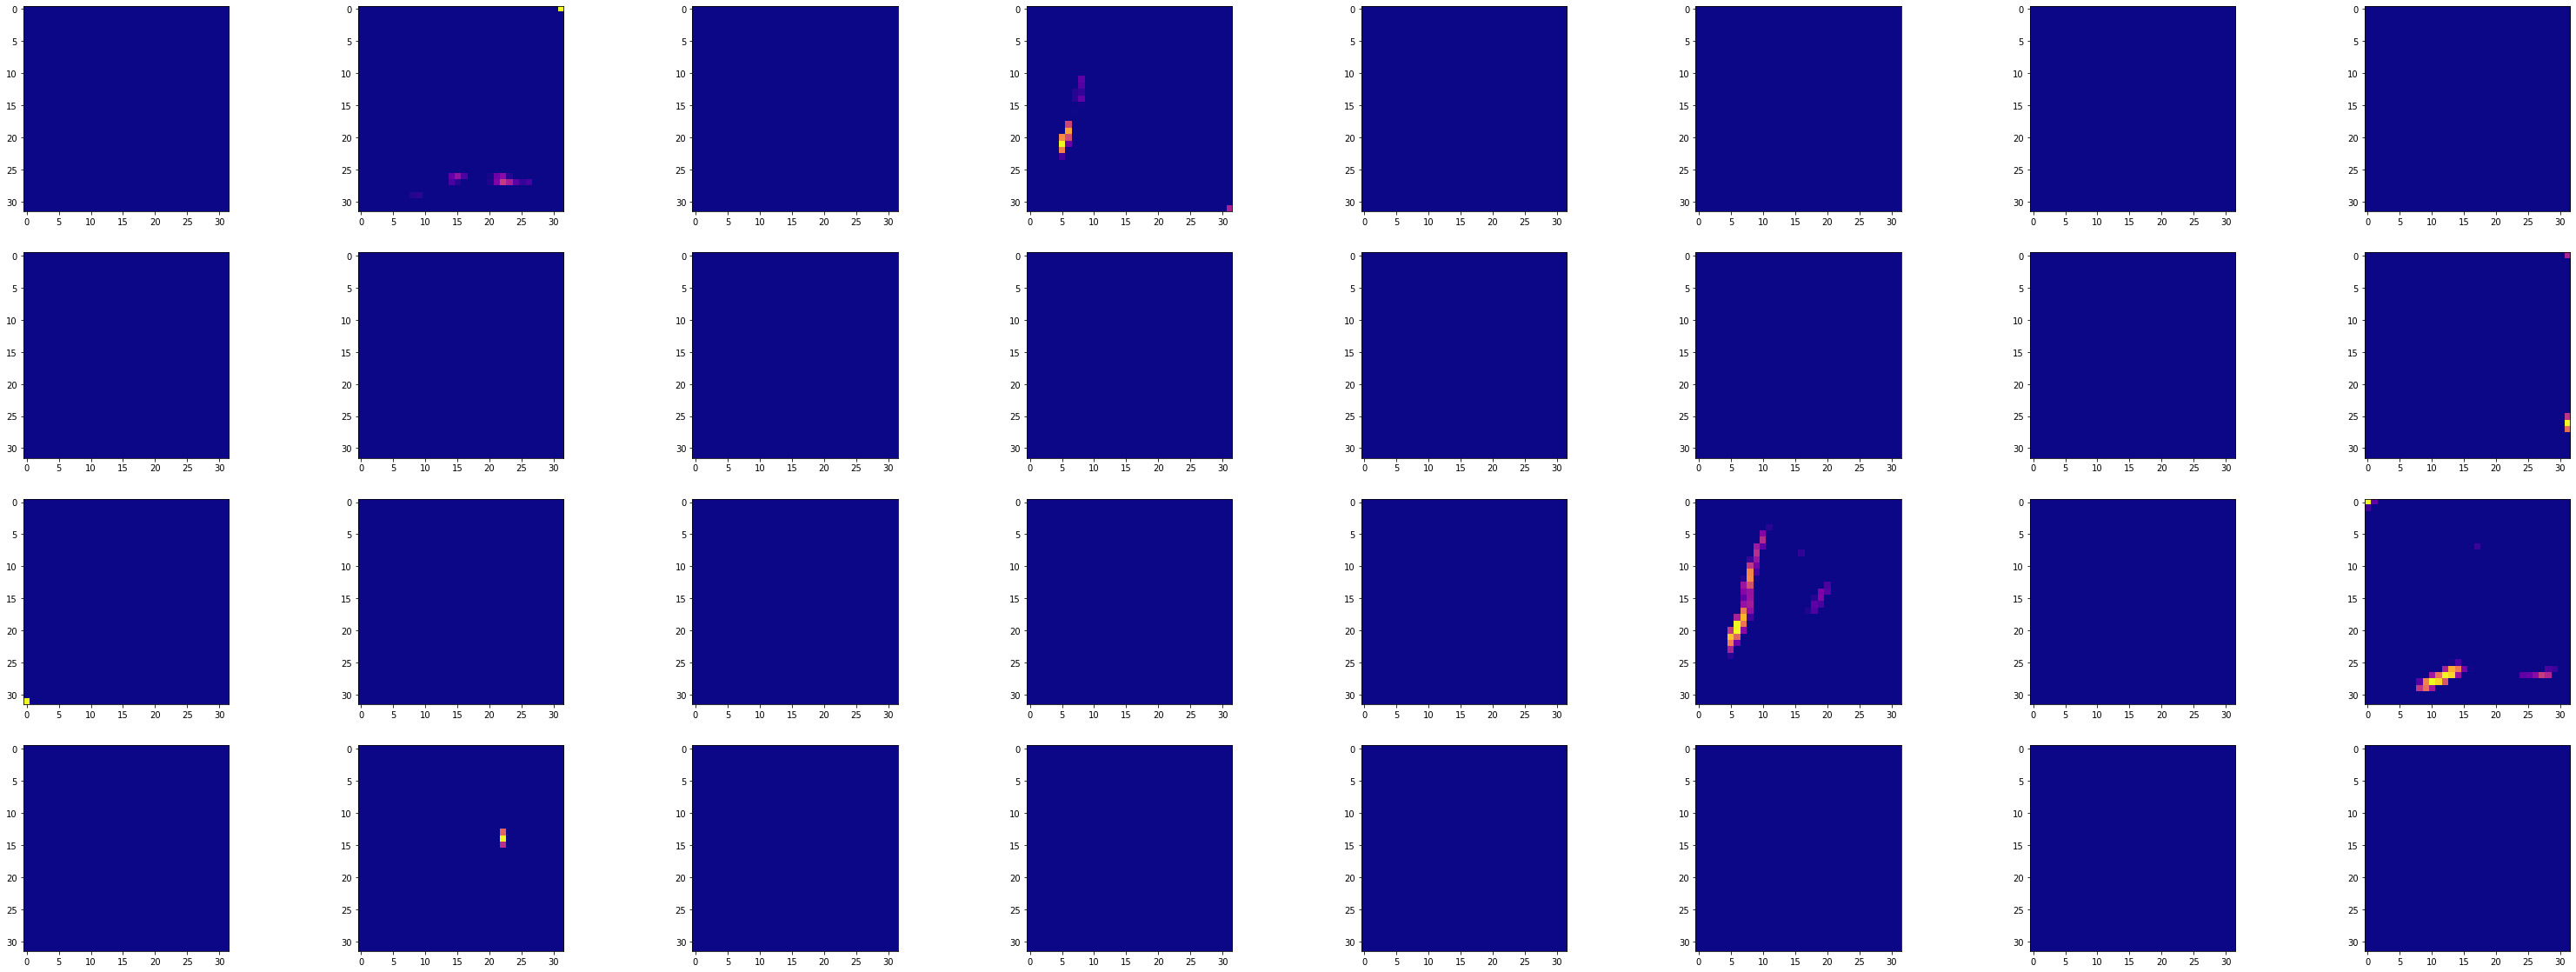

In [115]:
layer_outputs = [layer.output for layer in model.layers]

test_image = "../data/train/bear/0002.png"

# Le chargement de l'image doit être augmenté puisque notre model prend des lots d'images.
img = image.load_img(test_image, target_size=(32,32, 3))
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis=0)

activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_arr)

def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*13.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='plasma')
            activation_index += 1

display_activation(activations, 8, 4, 1)

In [151]:
model_1 = Sequential()
model_1.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(32,32,3))) # 5 ou 7 au dessus de 128
model_1.add(MaxPooling2D(pool_size=(4,4)))
model_1.add(Dense(512, activation='relu'))

model_1.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model_1.add(Conv2D(80, kernel_size=3, activation='relu', padding='same'))
model_1.add(MaxPooling2D(pool_size=(4,4)))
model_1.add(Dense(128, activation='relu'))

model_1.add(Conv2D(100, kernel_size=3, activation='relu', padding='same'))


model_1.add(Flatten())
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(10, activation='softmax'))

model_1.summary()


Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_92 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dense_63 (Dense)             (None, 8, 8, 512)         16896     
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 8, 8, 64)          294976    
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 8, 8, 80)          46160     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 2, 2, 80)          0         
_________________________________________________________________
dense_64 (Dense)             (None, 2, 2, 128)       

In [152]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8)
training = model_1.fit_generator(train_generator, epochs=50, callbacks=[es_callback], validation_data=validation_generator)

Epoch 1/50
125/125 [==============================] - 65s 522ms/step - loss: 2.2333 - accuracy: 0.2103 - val_loss: 1.9270 - val_accuracy: 0.3050
Epoch 2/50
125/125 [==============================] - 44s 350ms/step - loss: 1.8534 - accuracy: 0.3248 - val_loss: 1.7773 - val_accuracy: 0.3430
Epoch 3/50
125/125 [==============================] - 46s 366ms/step - loss: 1.6560 - accuracy: 0.3932 - val_loss: 1.5713 - val_accuracy: 0.4590
Epoch 4/50
125/125 [==============================] - 46s 372ms/step - loss: 1.4957 - accuracy: 0.4627 - val_loss: 1.4515 - val_accuracy: 0.5040
Epoch 5/50
125/125 [==============================] - 44s 355ms/step - loss: 1.4065 - accuracy: 0.4927 - val_loss: 1.5004 - val_accuracy: 0.4940
Epoch 6/50
125/125 [==============================] - 44s 353ms/step - loss: 1.2489 - accuracy: 0.5592 - val_loss: 1.4299 - val_accuracy: 0.5250
Epoch 7/50
125/125 [==============================] - 46s 366ms/step - loss: 1.1532 - accuracy: 0.5922 - val_loss: 1.3206 - val_ac

In [138]:
model_loss, model_accuracy = model_1.evaluate(validation_generator)

22/22 [==============================] - 1s 68ms/step - loss: 1.4841 - accuracy: 0.6243


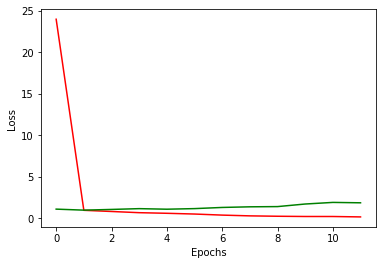

In [116]:
plt.plot(training.history['loss'], color='red', label='Training loss')
plt.plot(training.history['val_loss'],  color='green', label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

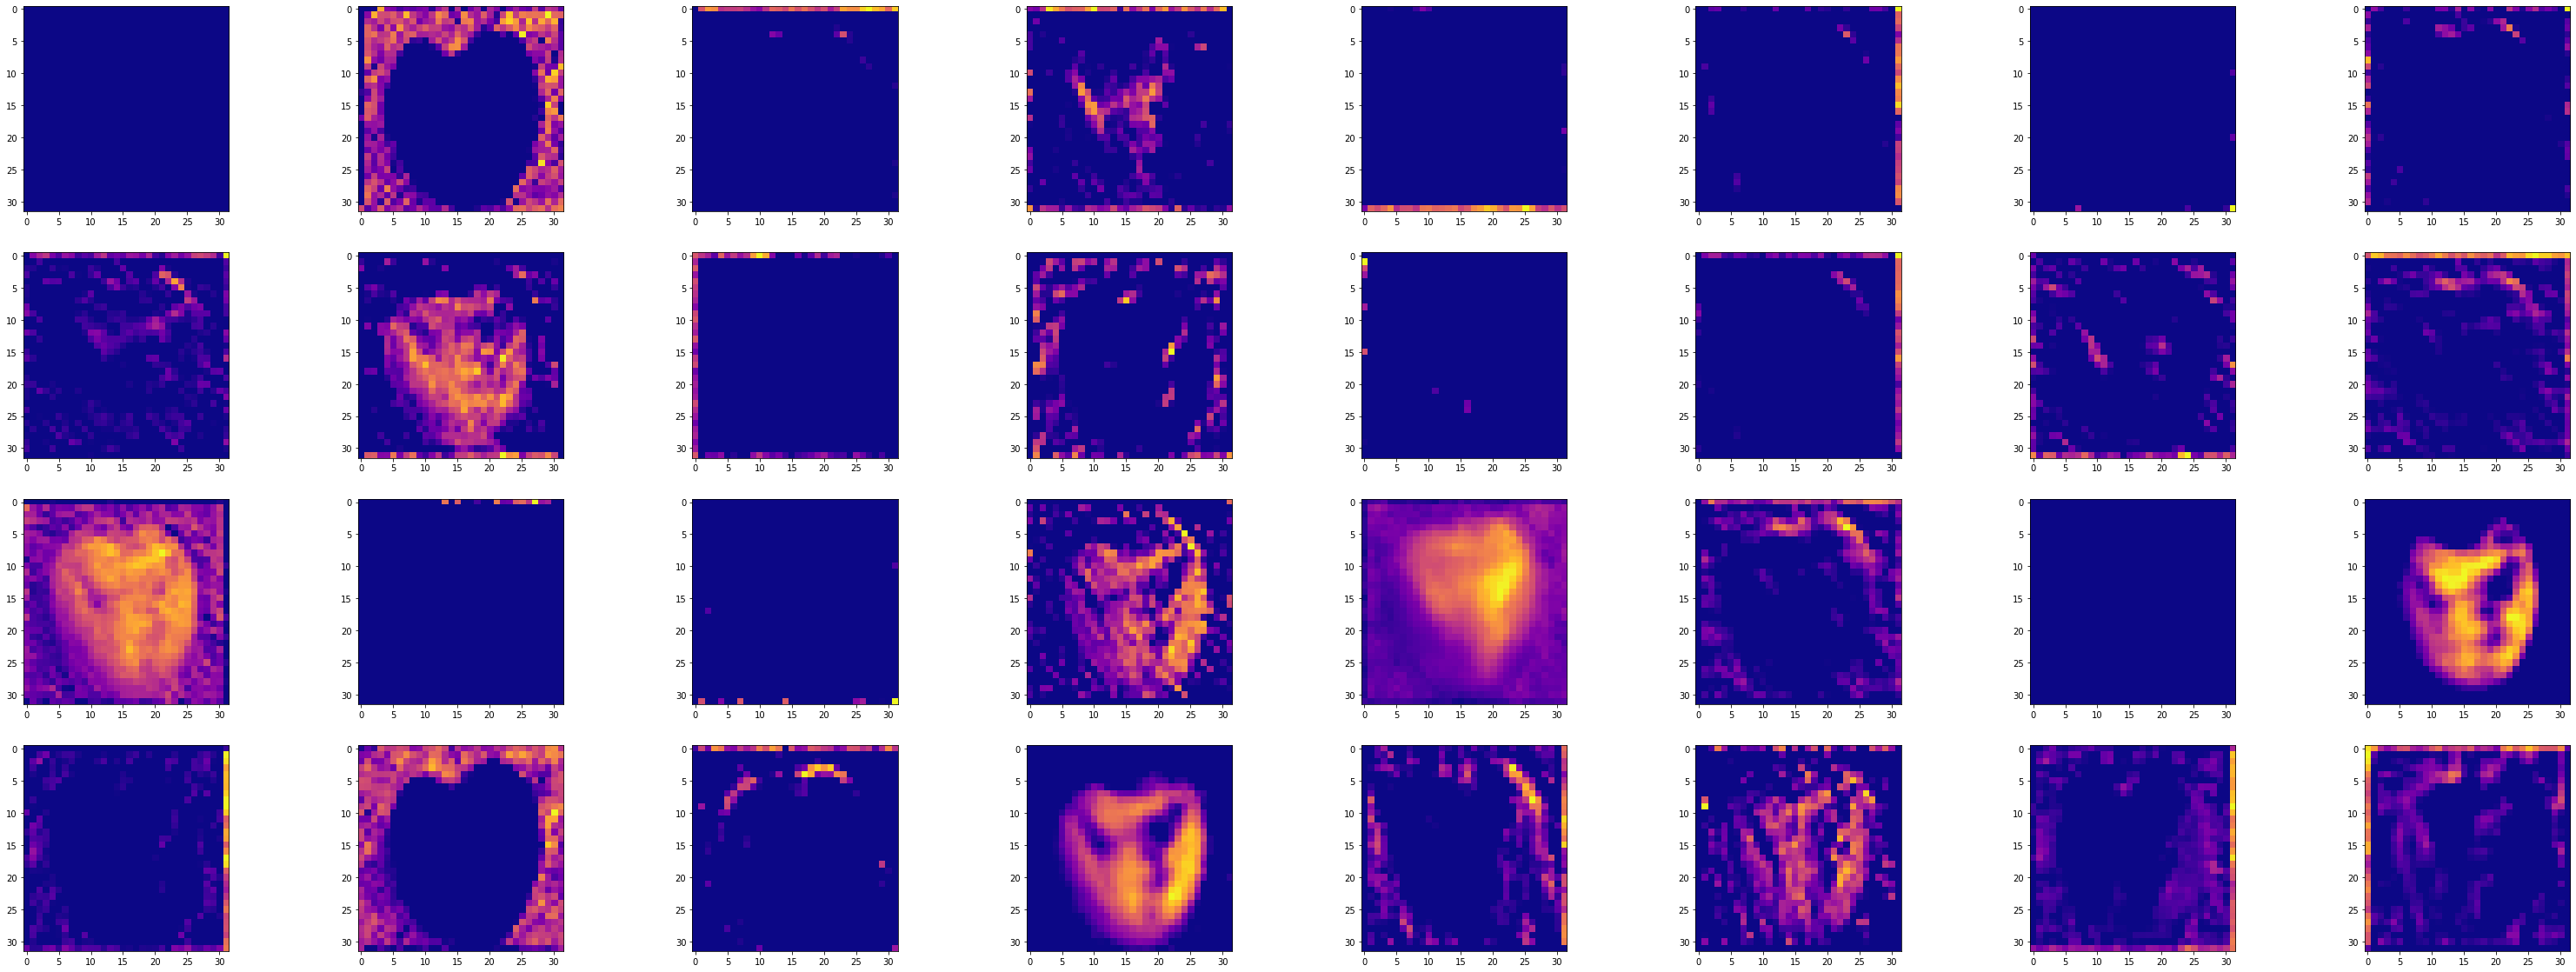

In [128]:
layer_outputs = [layer.output for layer in model_1.layers]

test_image = "../data/train/apple/0002.png"

# Le chargement de l'image doit être augmenté puisque notre model prend des lots d'images.
img = image.load_img(test_image, target_size=(32,32, 3))
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis=0)

activation_model_1 = Model(inputs=model_1.input, outputs=layer_outputs)
activations = activation_model_1.predict(img_arr)

def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*13.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='plasma')
            activation_index += 1

display_activation(activations, 8, 4, 0)

In [157]:
model_2 = Sequential()
model_2.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(32,32,3))) # 5 ou 7 au dessus de 128
model_2.add(MaxPooling2D(pool_size=(2,2)))

model_2.add(Conv2D(64, kernel_size=3, activation='relu', padding='same')
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))

model_2.add(Dense(10, activation='softmax'))

model_2.summary()


Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_99 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_46 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_73 (Dense)             (None, 128)               524416    
_________________________________________________________________
dense_74 (Dense)             (None, 10)                1290      
Total params: 527,498
Trainable params: 527,498
Non-trainable params: 0
_________________________________________________________________


In [160]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
training = model_2.fit_generator(train_generator, epochs=30, validation_data=validation_generator)

Epoch 1/30
125/125 [==============================] - 18s 141ms/step - loss: 0.3567 - accuracy: 0.8780 - val_loss: 2.8306 - val_accuracy: 0.5080
Epoch 2/30
125/125 [==============================] - 16s 131ms/step - loss: 0.2183 - accuracy: 0.9275 - val_loss: 2.9027 - val_accuracy: 0.5400
Epoch 3/30
125/125 [==============================] - 15s 123ms/step - loss: 0.2401 - accuracy: 0.9225 - val_loss: 3.0766 - val_accuracy: 0.5510
Epoch 4/30
125/125 [==============================] - 15s 123ms/step - loss: 0.2829 - accuracy: 0.9070 - val_loss: 3.2141 - val_accuracy: 0.5140
Epoch 5/30
125/125 [==============================] - 16s 128ms/step - loss: 0.2276 - accuracy: 0.9243 - val_loss: 3.4470 - val_accuracy: 0.5150
Epoch 6/30
125/125 [==============================] - 16s 128ms/step - loss: 0.1955 - accuracy: 0.9350 - val_loss: 3.2577 - val_accuracy: 0.5240
Epoch 7/30
125/125 [==============================] - 18s 142ms/step - loss: 0.1523 - accuracy: 0.9513 - val_loss: 3.7350 - val_ac

In [159]:
model_cnn = Sequential()
model_cnn.add(Conv2D(64, kernel_size=3, activation='relu', padding='same', input_shape=(32,32,3)))
model_cnn.add(Conv2D(72, kernel_size=3, activation='relu', padding='same'))
model_cnn.add(MaxPooling2D(pool_size=(4,4)))

model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))

model_cnn.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 32, 32, 72)        41544     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 8, 8, 72)          0         
_________________________________________________________________
flatten_47 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_75 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_76 (Dense)             (None, 10)                1290      
Total params: 634,578
Trainable params: 634,578
Non-trainable params: 0
_______________________________________________

In [ ]:
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
training = model_2.fit_generator(train_generator, epochs=30, validation_data=validation_generator)